In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

### 불러오기 및 head()
    -Name,Sex,Cabin,Embarked는 문자열
    -범주형=Embarked,SibSp,Parch 순서형=Pclass
    -연속형=Age,Fare 이산=Survived,Sex
    -Cabin과 Age Embarked가 na값을 가진다.
    -tiket이 수치형,영숫자형 혼합되었다.
    -cabin이 영숫자형이다.

In [62]:
train=pd.read_csv('./titanic/train.csv')
test=pd.read_csv('./titanic/test.csv')
test_pi=test['PassengerId']
train.head()#상위 5개 구경

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Eda&Feature Engineering
### #데이터의 형태 검사.
    - 결측지=Age,Cabin,Embarked
    - 문자열 자료형=Name,Sex,Ticket,Cabin,Embarked 이라는 것을 재확인 가능.

In [63]:
print(train.columns.values)
train.info()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### describe()로 통계적 수치 확인
    -연속형인 나이에 결측치가 있으니 어떻게 처리할지 결정해야한다.
    -Feature Engineering이 끝나게 되면 상관계수 분석을 통해 insight가 생길것
    -Fare값에 평균치와 사분위수에서 떨어진 비정상적인 max값이 관측된다.

In [64]:
train.iloc[:,1:].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 문자열로 되어있는 특성의 describe()
    -Cabin(호실 번호)에 너무 많은 Null값이 보인다.
    -최종 Feature Engineering이후에 상관도가 보이지 않는다면 Drop할 것.

In [65]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sirota, Mr. Maurice",male,1601,B96 B98,S
freq,1,577,7,4,644


In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 분석을 위한 가정
    -ticket특성은 Feature Engineering 이후에 연관이 없을 경우 제거한다.
    -Cabin특성은 너무 N/a값이 많아서 제거하는게 좋을것이다.
    -PassengerId는 단순 의미없는 Index에 불과한 것이 자명하므로 Drop한다.
    -Name특성은 영향이 없을 것 같지만 Mr,Miss,Mrs등의 빈도수가 높은 특징이 있어, 범주자료형을 뽑을 수 있을 듯 하다.
    -parch와SibSp의 값을 이용해 Family라는 특성으로 바꾸면 가족의 수를 알 수 있다.
    -Fare을 범주형으로 바꾸거나 정규화를 할 수 있을 것 같다. 아마도 정규화 보다는 티켓 가격이 클래스 마다 일정한 범위가 있을 것이니 범주형이 나을 것 같다.
    -Embarked(탑승 항구)의 특성은 결측치의 수가 2개로 매우 적다. 상관 분석을 통해 가장 연관이 높은 특성과 연관지어 채울것이다.

### matplotlib을 사용해 생존자의 수 확인.
    -38.4%가량이 생존

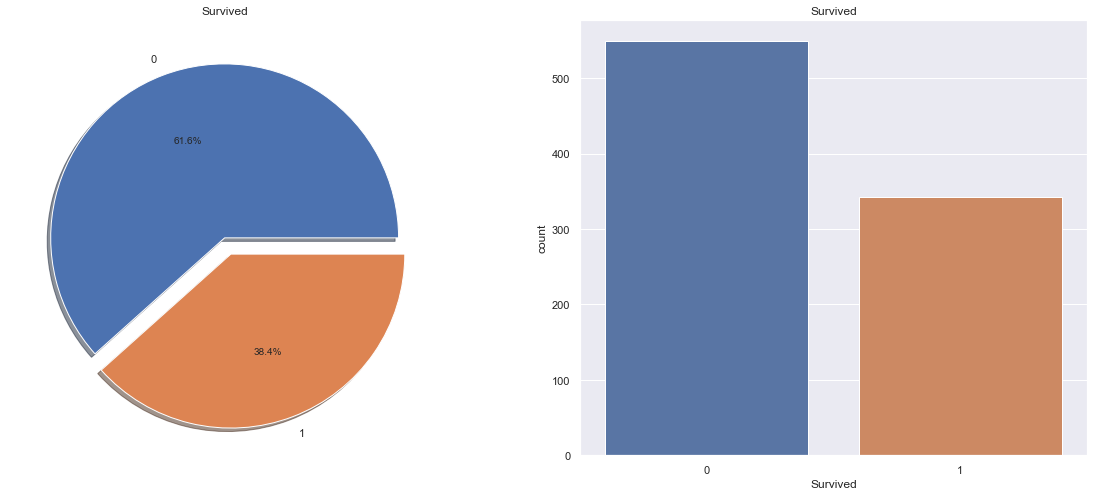

In [67]:
f,ax = plt.subplots(1,2,figsize=(20,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### PassengerId Drop

In [68]:
train=train.drop('PassengerId',axis=1)
test=test.drop('PassengerId',axis=1)

#### Survived에 영향을 미치는지 직관적으로 확인하기 위한 barchart를 만드는 함수.

In [69]:
sns.set()
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.show()

### 성별특성의 bar_chart와 Feature Engineering
    -성별이 생존에 영향을 미쳤음을 직관적으로 알 수 있다.

,Sex,Survived
0,female,0.742038
1,male,0.188908


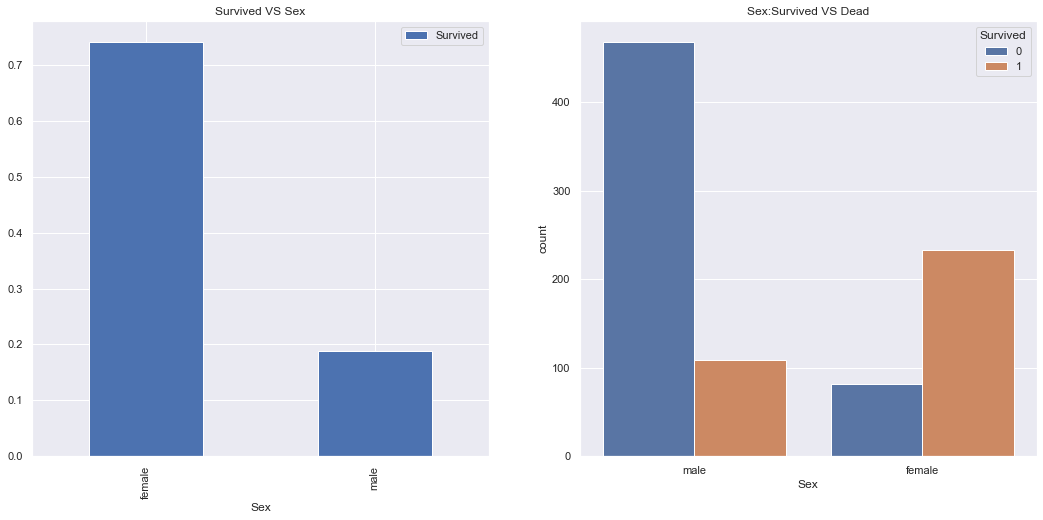

In [70]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived VS Dead')
plt.show
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=True)

In [71]:
#성별을 범주형 자료형으로 변경.
combine=[train,test]
sex_mapping={'male':0,'female':1}
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### Pclass특성의 시각화
    -등급이 생사에 영향을 미쳤다.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


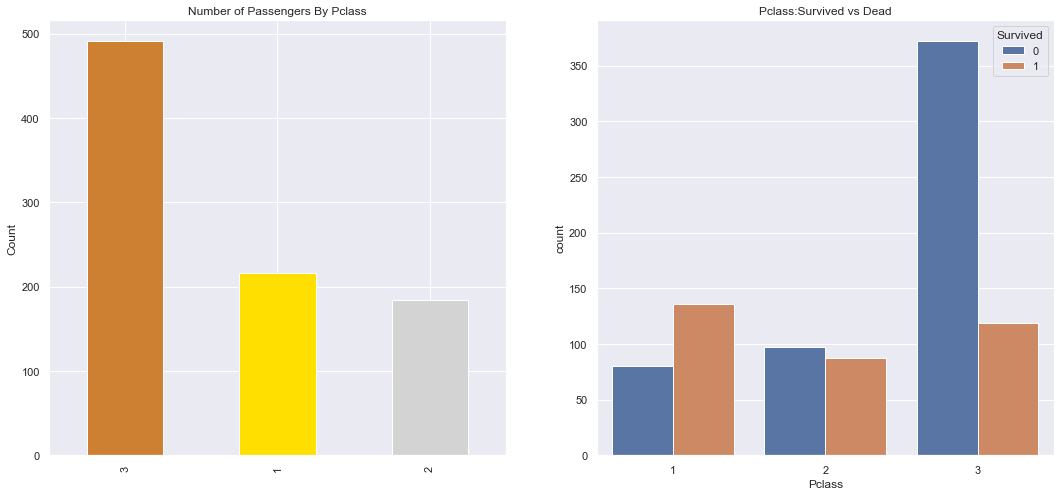

In [72]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=True)

### SipSp와 Parch를 Family특성으로 합친다.
    - 특성과 생존에 대한 연관을 직관적으로 알기는 어렵다.
    - 생존에 대한 연관성은 있는 것 같다.
    - 가족이 3명일때 생존률이 가장 높다.

In [73]:
train['Family']=train['SibSp']+train['Parch']
test['Family']=test['SibSp']+test['Parch']

In [74]:
fd=['SibSp','Parch']
train=train.drop(fd,axis=1)
test=test.drop(fd,axis=1)
train.head(100)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
95,0,3,"Shorney, Mr. Charles Joseph",0,NaN,374910,8.0500,NaN,S,0
96,0,1,"Goldschmidt, Mr. George B",0,71.0,PC 17754,34.6542,A5,C,0
97,1,1,"Greenfield, Mr. William Bertram",0,23.0,PC 17759,63.3583,D10 D12,C,1
98,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,34.0,231919,23.0000,NaN,S,1


   Family  Survived
0       0  0.303538
1       1  0.552795
2       2  0.578431
3       3  0.724138
4       4  0.200000
5       5  0.136364
6       6  0.333333
7       7  0.000000
8      10  0.000000


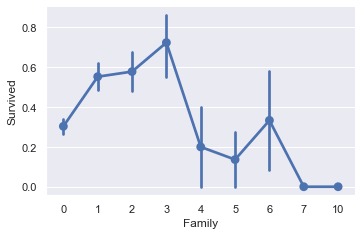

In [75]:
sns.factorplot('Family','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
print(train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Family', ascending=True))

### Name함수의 Feature Enginerring
    -Mr,Miss,Mrs 등의 규칙형 변수가 있으므로 이를 통해 범주형으로 변환

In [16]:
combine=[train,test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])
print(train['Title'].value_counts())
print("--"*20)
print(test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Don           1
Ms            1
Countess      1
Capt          1
Jonkheer      1
Sir           1
Lady          1
Name: Title, dtype: int64
----------------------------------------
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64


In [17]:
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
test['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)

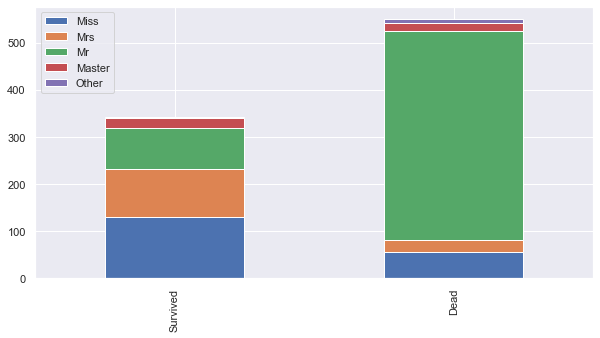

In [18]:
bar_chart('Title')

### Title의 호칭별 평균값으로 Age의 결측치 처리

In [19]:
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age']=4
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Title=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Title=='Other'),'Age']=46

In [21]:
test.loc[(test.Age.isnull())&(test.Title=='Master'),'Age']=4
test.loc[(test.Age.isnull())&(test.Title=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Title=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Title=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Title=='Other'),'Age']=46

#### Age값의 시각화 
    -최 연장자가 생존했다.
    -15-25생존율이 낮다.
    -15-35세가 거의 다이다.
    -나이를 그룹별로 묶어야한다.
    -영유아의 생존률이 높다.

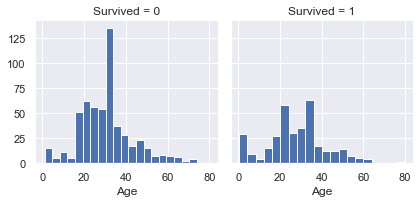

In [22]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

### Age값을 범주별로 나눔
    - Qcut을 이용해서 분위수로 나누려 했으나, 특이값을 가지는 일정 범위에 몰려있어 범주로 나누었다.

In [23]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4

test['Age_band']=0
test.loc[test['Age']<=16,'Age_band']=0
test.loc[(test['Age']>16)&(test['Age']<=32),'Age_band']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_band']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_band']=3
test.loc[test['Age']>64,'Age_band']=4
test.head(2)


,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Age_band
0,3,"Kelly, Mr. James",0,34.5,330911,7.8292,NaN,Q,0,Mr,2
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,NaN,S,1,Mrs,2


### Embarked

#### -탑승 항구별 생존률

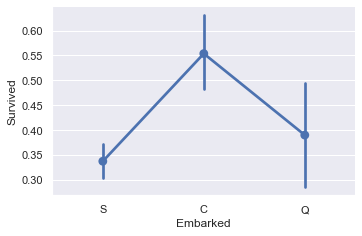

In [24]:
sns.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)

### Embarked의 결측치 처리
#### -결측치 2명의 Pclass값이 1로 동일하고 Embarked는 Pclass와 연관이 깊으며, 1일때 S에서 탈 확률이 가장 높으므로 결측치를 1로 대체

In [25]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Age_band
61,1,1,"Icard, Miss. Amelie",1,38.0,113572,80.0,B28,NaN,0,Miss,2
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,113572,80.0,B28,NaN,0,Mrs,3


In [26]:
train.groupby(['Pclass','Embarked'])['Survived'].count()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Survived, dtype: int64

In [27]:
train['Embarked'].fillna('S',inplace=True)

### Fare
    - 1등급 객실은 대략 70, 2등급은 대략 10-30,3등급은 10미만

<function matplotlib.pyplot.show(close=None, block=None)>

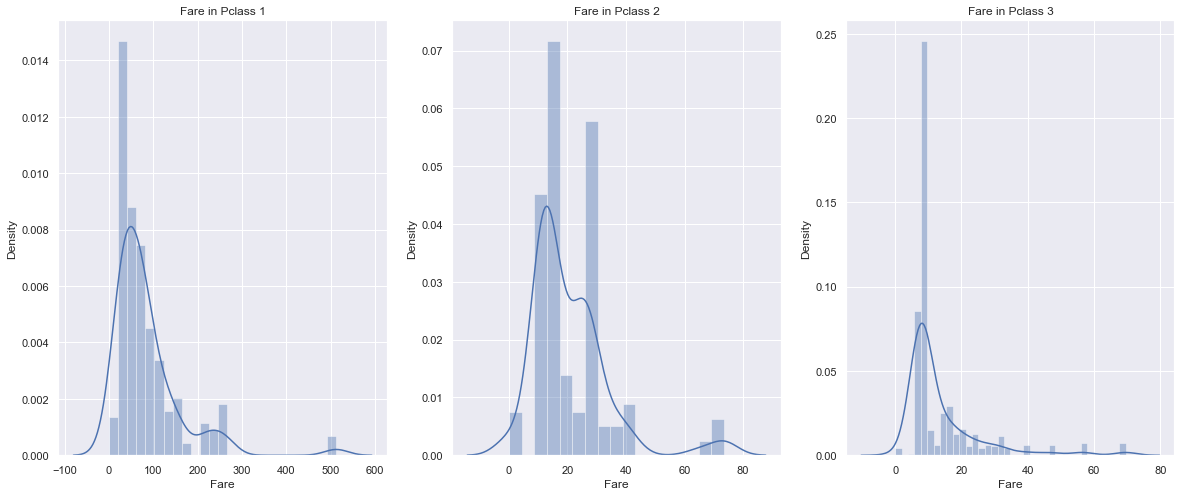

In [28]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.show

In [29]:
train.drop('Name',axis=1)
test.drop('Name',axis=1)

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Age_band
0,3,0,34.5,330911,7.8292,NaN,Q,0,Mr,2
1,3,1,47.0,363272,7.0000,NaN,S,1,Mrs,2
2,2,0,62.0,240276,9.6875,NaN,Q,0,Mr,3
3,3,0,27.0,315154,8.6625,NaN,S,0,Mr,1
4,3,1,22.0,3101298,12.2875,NaN,S,2,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,33.0,A.5. 3236,8.0500,NaN,S,0,Mr,2
414,1,1,39.0,PC 17758,108.9000,C105,C,0,Other,2
415,3,0,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr,2
416,3,0,33.0,359309,8.0500,NaN,S,0,Mr,2


In [30]:
#qcut으로 분위수에 따라 4등분을 한 Fare_Range를 보임
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
train

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Age_band,Fare_Range
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,Mr,1,"(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,Mrs,2,"(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,"(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,Mrs,2,"(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,Mr,2,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,NaN,S,0,Other,1,"(7.91, 14.454]"
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,B42,S,0,Miss,1,"(14.454, 31.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,W./C. 6607,23.4500,NaN,S,3,Miss,1,"(14.454, 31.0]"
889,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,C148,C,0,Mr,1,"(14.454, 31.0]"


In [31]:
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3
test['Fare_cat']=0
test.loc[test['Fare']<=7.91,'Fare_cat']=0
test.loc[(test['Fare']>7.91)&(test['Fare']<=14.454),'Fare_cat']=1
test.loc[(test['Fare']>14.454)&(test['Fare']<=31),'Fare_cat']=2
test.loc[(test['Fare']>31)&(test['Fare']<=513),'Fare_cat']=3

In [32]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Age_band,Fare_Range,Fare_cat
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,Mr,1,"(-0.001, 7.91]",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,Mrs,2,"(31.0, 512.329]",3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,"(7.91, 14.454]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,Mrs,2,"(31.0, 512.329]",3
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,Mr,2,"(7.91, 14.454]",1


In [33]:
test.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Age_band,Fare_cat
0,3,"Kelly, Mr. James",0,34.5,330911,7.8292,NaN,Q,0,Mr,2,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,NaN,S,1,Mrs,2,0
2,2,"Myles, Mr. Thomas Francis",0,62.0,240276,9.6875,NaN,Q,0,Mr,3,1
3,3,"Wirz, Mr. Albert",0,27.0,315154,8.6625,NaN,S,0,Mr,1,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3101298,12.2875,NaN,S,2,Mrs,1,1


In [34]:
dro=['Name','Age','Fare','Ticket','Cabin']
train=train.drop(dro,axis=1)
train=train.drop('Fare_Range',axis=1)
test=test.drop(dro,axis=1)

In [35]:
train['Embarked'].replace(['S','Q','C'],[0,1,2],inplace=True)
train['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
test['Embarked'].replace(['S','Q','C'],[0,1,2],inplace=True)
test['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

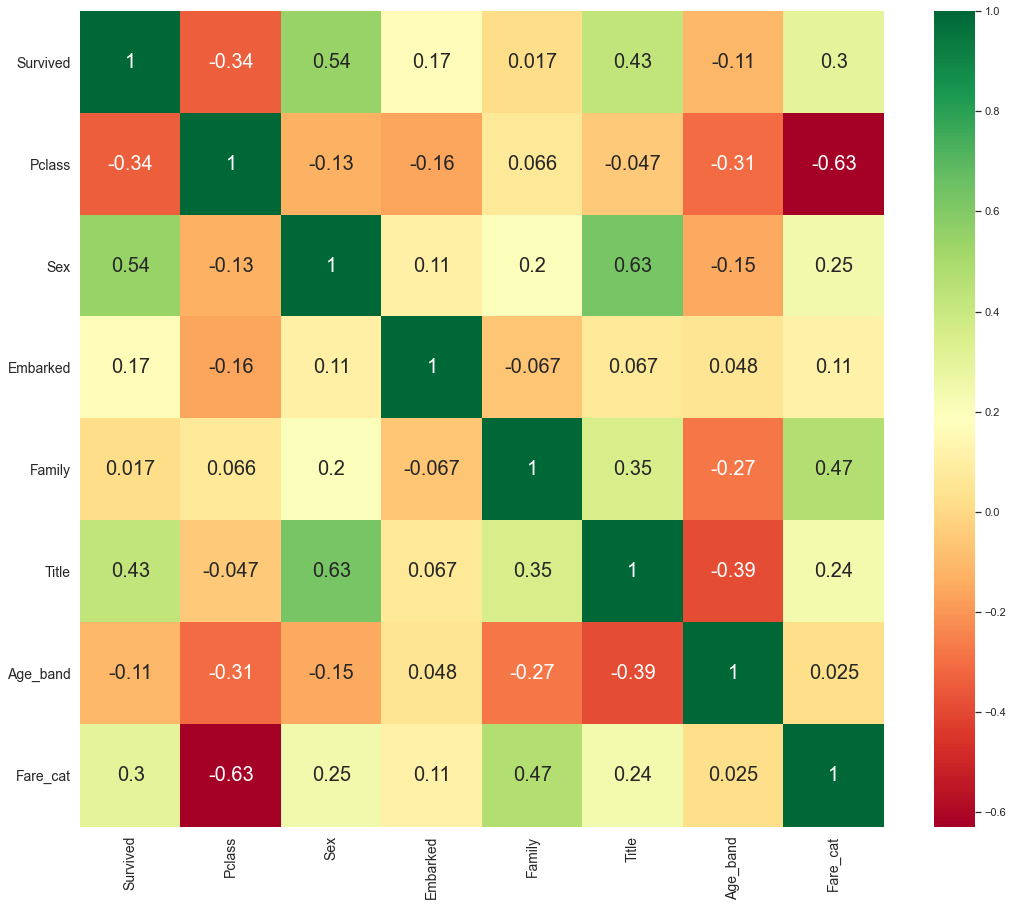

In [36]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 모델링 및 예측

### 기본 모델들

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

In [38]:
tr,te=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
train_x=tr[train.columns[1:]]
train_y=tr[train.columns[:1]]
test_x=te[te.columns[1:]]
test_y=te[te.columns[:1]]

In [39]:
clf1=svm.SVC(kernel='rbf',C=1,gamma=0.1)
clf2=LogisticRegression()
clf3=DecisionTreeClassifier()
clf4=KNeighborsClassifier()
clf5=GaussianNB()
clf6=RandomForestClassifier(n_estimators=100)
clf7=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)


clf1.fit(train_x,train_y)
clf2.fit(train_x,train_y)
clf3.fit(train_x,train_y)
clf4.fit(train_x,train_y)
clf5.fit(train_x,train_y)
clf6.fit(train_x,train_y)
clf7.fit(train_x,train_y)

prediction1=clf1.predict(test_x)
prediction2=clf2.predict(test_x)
prediction3=clf3.predict(test_x)
prediction4=clf4.predict(test_x)
prediction5=clf5.predict(test_x)
prediction6=clf6.predict(test_x)
prediction7=clf7.predict(test_x)

In [40]:
print('Accuracy of rbf SVM is ',metrics.accuracy_score(prediction1,test_y))
print('Accuracy of the LogisticRegression is ',metrics.accuracy_score(prediction2,test_y))
print('Accuracy of the Decision Tree is ',metrics.accuracy_score(prediction3,test_y))
print('Accuracy of the KNN is ',metrics.accuracy_score(prediction4,test_y))
print('Accuracy of the NaiveBayes is ',metrics.accuracy_score(prediction5,test_y))
print('Accuracy of the Random Forest is ',metrics.accuracy_score(prediction6,test_y))
print('Accuracy of AdaBoost is ',metrics.accuracy_score(prediction7,test_y))

Accuracy of rbf SVM is  0.835820895522388
Accuracy of the LogisticRegression is  0.8134328358208955
Accuracy of the Decision Tree is  0.8134328358208955
Accuracy of the KNN is  0.8246268656716418
Accuracy of the NaiveBayes is  0.8059701492537313
Accuracy of the Random Forest is  0.8022388059701493
Accuracy of AdaBoost is  0.832089552238806


### 교차검증
    -KFold교차검증을 통해 향상된 성능 획득.
    -boxplot으로 확인

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10,random_state=22,shuffle=True)
xyz = []
accuracy = []
std = []
classifiers=['Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,train_x,train_y,cv=kfold,scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Radial Svm,0.831388,0.037798
Logistic Regression,0.789734,0.041569
KNN,0.810471,0.037071
Decision Tree,0.810599,0.043580
Naive Bayes,0.794598,0.042764
Random Forest,0.812135,0.034764


<AxesSubplot:>

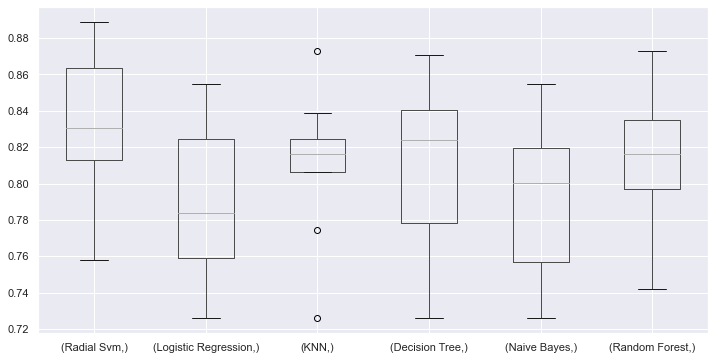

In [42]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

### 파라미터 튜닝
    -그리드서치를 통해 랜덤포레스트의 최적 파라미터 결정.

## randomforest tuning

In [59]:
from sklearn.model_selection import GridSearchCV
n_estimators=range(100,1000,100)
criterion=["gini","entropy"]
max_depth=[None,5,10,20]
hyper={'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth}
gd=GridSearchCV(estimator=RandomForestClassifier(n_jobs=4,random_state=0),param_grid=hyper,verbose=True)
gd.fit(train_x,train_y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.8314580645161291
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


### SVM tunning

In [83]:
from sklearn.model_selection import GridSearchCV
C=[0.5,0.75,1.0,1.25,1.5,1.75,2.0]
gamma=[1.0,2.0,3.0,'auto']
hyper={'C':C,'gamma':gamma}
gd1=GridSearchCV(estimator=svm.SVC(random_state=0),param_grid=hyper,verbose=True)
gd1.fit(train_x,train_y)
print(gd1.best_score_)
print(gd1.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.8298322580645161
{'C': 1.25, 'gamma': 'auto'}


## voting

In [84]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(C=1.25,kernel='rbf',gamma='auto',probability=True,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB())],
                                 voting='soft').fit(train_x,train_y)
print('The accuracy for ensembled model is : ',ensemble_lin_rbf.score(test_x,test_y))
cross=cross_val_score(ensemble_lin_rbf,train_x,train_y,cv=10,scoring="accuracy")
print('The cross validated score is',cross.mean())

SyntaxError: keyword argument repeated: C (<ipython-input-84-a4982afb966d>, line 3)

In [45]:
submission=pd.DataFrame({"PassengerId":test_pi,"Survived":ensemble_lin_rbf.predict(test)})
submission.to_csv('submission.csv', index=False)